# Take a look in the Data


Here it’s the link for retrieving the Cluster and the BCG catalog


----------------------------------------------

Data from SDSS + SPIDERS

----------------------------------------------

HOW DATA WAS CONSTRUCTED:

	1. Cluster data (from catCluster-SPIDERS_RASS_CLUS-v3.0.fits) is joined
	with BCG data (from SpidersXclusterBCGs-v2.0.fits). Some clusters are
	dropped out because no BCG data.

	2. Use astroquery to query SDSS galaxies within 2*R200c of each cluster. R200c
	estimated from Lx assuming an X-ray Luminosity --- halo mass relation.


HOW TO READ THIS DATA:

	The HDF5 files were written using the pandas python package.
	You can quickly load them and turn them into 2D numpy arrays
	using the following commands:

	*****

	import pandas as pd
	import numpy as np

	Galaxy_data  = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Galaxies').to_numpy()
	Cluster_data = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Clusters').to_numpy()


	*****

	Each of 'Galaxy_data' and 'Cluster_data' will be a 2D numpy array 
	that you can index into using slicing.

	If you leave them as pandas dataframes you can also quickly access
	an individual column and turn it into a numpy array via:

	******

	Pandas_Series = Galaxy_data  [quantity_name]
	Numpy_array   = Galaxy_data  [quantity_name].values

	
	******


NOTES:
	1. 

---------------------------------------

Cluster Catalog properties

---------------------------------------

CLUZSPEC: Spectroscopic redshift of cluster BCG


---------------------------------------

Galaxy catalog properties
---------------------------------------

CLUS_ID: The SPIDERS ID of the cluster. Can use this to join Cluster Catalog properties
	 with the Galaxy Catalog.
     
v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [27]:
import matplotlib.pyplot as plt

In [34]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


In [9]:
list(Cluster_data.columns)

['CLUS_ID',
 'NCOMPONENT',
 'CODEX',
 'RA',
 'DEC',
 'RA_OPT',
 'DEC_OPT',
 'LAMBDA_CHISQ_OPT',
 'Z_LAMBDA',
 'Z_LAMBDA_ERR',
 'NMEM',
 'NOKZ',
 'SCREEN_CLUZSPEC',
 'SCREEN_CLUZSPEC_ERR',
 'SCREEN_CLUZSPEC_SPREAD',
 'SCREEN_CLUVDISP_GAP',
 'SCREEN_CLUVDISP_BWT',
 'SCREEN_CLUVDISP_BEST',
 'SCREEN_NMEMBERS_W',
 'STATUS',
 'NINSPECTORS',
 'NVALID',
 'LX0124',
 'ELX',
 'R200C_DEG',
 'FLUX052',
 'EFLUX052',
 'MCXC',
 'ANAME',
 'CLUZSPEC',
 'RA_BCG',
 'DEC_BCG',
 'Mass_med',
 'SFR_MEDIAN',
 'flag_SFR_MPA_JHU',
 'GAL_sdss_g_modS_CHI2NU',
 'GAL_sdss_g_modS_C1_MAG',
 'GAL_sdss_g_modS_C1_RE',
 'GAL_sdss_g_modS_C1_N',
 'GAL_sdss_g_modS_C1_AR',
 'GAL_sdss_g_modS_C1_PA',
 'GAL_sdss_g_modS_C1_MAG_ERR',
 'GAL_sdss_g_modS_C1_RE_ERR',
 'GAL_sdss_g_modS_C1_N_ERR',
 'GAL_sdss_g_modS_C1_AR_ERR',
 'GAL_sdss_g_modS_C1_PA_ERR',
 'GAL_sdss_r_modS_CHI2NU',
 'GAL_sdss_r_modS_C1_MAG',
 'GAL_sdss_r_modS_C1_RE',
 'GAL_sdss_r_modS_C1_N',
 'GAL_sdss_r_modS_C1_AR',
 'GAL_sdss_r_modS_C1_PA',
 'GAL_sdss_r_modS_C1_MAG_E

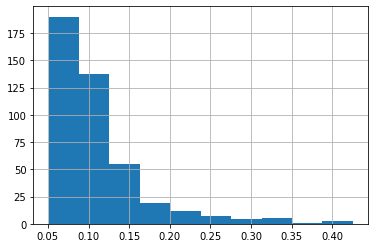

In [88]:
Cluster_data.R200C_DEG.hist()

In [22]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [11]:
list(Galaxy_data.columns)

['specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [23]:
Galaxy_data

,specobjid,CLUS_ID,z,zErr,v_los,cModelMag_r,cModelMagErr_r,flags_r,extinction_r,cModelMag_g,cModelMagErr_g,flags_g,extinction_g
0,4.163690e+18,1_1172,0.521020,0.000072,113729.327919,21.23721,0.107189,2312669052545302545,0.086831,21.21924,0.164698,2308165452926320913,0.125516
1,4.163690e+18,1_1172,0.593601,0.000136,133461.908338,19.90780,0.041608,4503874773746976,0.088387,20.70138,0.104693,275154764032,0.127765
2,4.163692e+18,1_1172,-0.000089,0.000028,-27945.246770,19.87510,0.018645,4503874807300112,0.088158,20.09538,0.017178,302022672,0.127434
3,4.163691e+18,1_1172,0.064723,0.000011,-10324.856170,21.13658,0.220534,4574243551477777,0.087460,21.02419,0.101374,302022672,0.126425
4,4.163692e+18,1_1172,0.000157,0.000022,-27878.630948,18.07116,0.007055,4503599895838720,0.088666,18.96835,0.009199,268468224,0.128168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.070675e+18,2_8798,0.748726,0.000324,84248.928930,21.46979,0.106724,4503874773712896,0.086909,23.19524,0.329890,45035996416311553,0.125628
62628,7.070689e+18,2_8798,0.574574,0.000254,46003.132747,20.83404,0.082966,2312598683801124880,0.090654,22.86997,0.566033,2308094809170018577,0.131042
62629,7.071971e+18,2_8798,0.131957,0.000023,-51201.085679,16.51469,0.005301,4503875377725512,0.087683,17.59219,0.007735,275213484104,0.126747
62630,7.071996e+18,2_8798,0.495189,0.000195,28569.139443,20.74894,0.062876,2312598683801124888,0.087983,22.34427,0.181467,2305843284368458008,0.127181


In [25]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

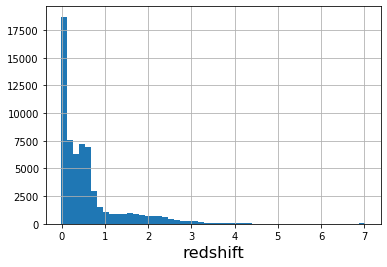

In [44]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

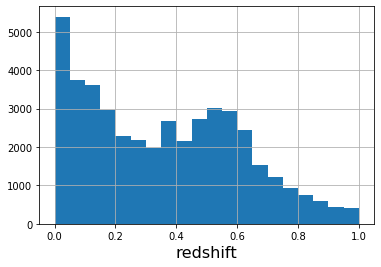

In [43]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

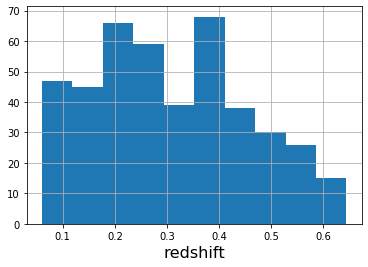

In [42]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

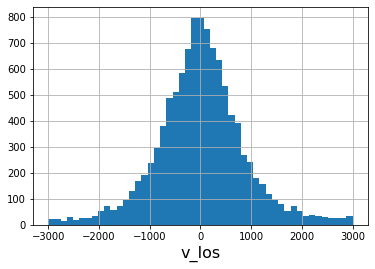

In [41]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)


Query: SDSS Dataset
---------------------------------------

Here we want to add information to the galaxy sample. Basically we need the galaxy distance from the cluster center, $R$, and the star formation rate, $SFR$.

Example query:

----------------------------------------------
    -- This query demonstrates the use of a LEFT OUTER JOIN to include rows from the joined table
    -- that do not satisfy the JOIN condition. The OUTER JOIN (LEFT or RIGHT)
    -- is an inclusive JOIN, whereas the INNER (default) JOIN is an exclusive JOIN.
    -- In this case the query returns galaxies with or without spectra that meet the criteria
    -- in the WHERE clause. The ISNULL operator is used to replace null
    -- values with zeros for galaxies without spectra.

----------------------------------------------
    SELECT TOP 10 p.objid, p.ra, p.dec, ISNULL(s.specobjid,0) AS specobjid, ISNULL(s.z, 0) AS z
    FROM Galaxy AS p
    LEFT OUTER JOIN SpecObj s ON s.bestObjID = p.objID
    WHERE
    p.u BETWEEN 0 AND 19.6 AND p.g BETWEEN 0 AND 20


In [49]:
#!conda install -c conda-forge astroquery

In [144]:
from astropy.table import Table,vstack

In [132]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

## Example
rac,dec= Cluster_data['RA'][0],Cluster_data['DEC'][0]
pos = coords.SkyCoord(rac,dec, frame='icrs', unit='deg')

r   = 2*Cluster_data.R200C_DEG[0]*u.deg
xid = SDSS.query_region(pos, radius=r, spectro=True)

In [133]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],xid['specobjid'])]

,specobjid,CLUS_ID,z,zErr,v_los,cModelMag_r,cModelMagErr_r,flags_r,extinction_r,cModelMag_g,cModelMagErr_g,flags_g,extinction_g
0,4.163690e+18,1_1172,0.521020,0.000072,113729.327919,21.23721,0.107189,2312669052545302545,0.086831,21.21924,0.164698,2308165452926320913,0.125516
1,4.163690e+18,1_1172,0.593601,0.000136,133461.908338,19.90780,0.041608,4503874773746976,0.088387,20.70138,0.104693,275154764032,0.127765
2,4.163692e+18,1_1172,-0.000089,0.000028,-27945.246770,19.87510,0.018645,4503874807300112,0.088158,20.09538,0.017178,302022672,0.127434
3,4.163691e+18,1_1172,0.064723,0.000011,-10324.856170,21.13658,0.220534,4574243551477777,0.087460,21.02419,0.101374,302022672,0.126425
4,4.163692e+18,1_1172,0.000157,0.000022,-27878.630948,18.07116,0.007055,4503599895838720,0.088666,18.96835,0.009199,268468224,0.128168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,8.197802e+18,1_1172,1.151662,0.000404,285182.637953,21.79428,0.205692,4503599895840016,0.078120,26.92584,3.405143,9007199397380369,0.112924
270,8.197802e+18,1_1172,0.967251,0.000276,235046.529487,21.69377,0.131835,4503874773712896,0.081237,22.90532,0.168019,275154731264,0.117429
271,8.197811e+18,1_1172,0.574141,0.000338,128171.184536,21.77940,0.156493,4503874773712896,0.090468,22.74752,0.555358,9007199388960001,0.130773
272,8.197813e+18,1_1172,0.036921,0.000046,-17883.293638,21.93774,0.364183,4503874808315920,0.083961,22.17694,0.191390,275181080592,0.121367


In [134]:
xid['ra','dec','objid']

ra,dec,objid
float64,float64,int64
119.731850983542,53.808629370114,1237663788492849298
120.007653253515,53.8058947518575,1237663788492915062
119.916592586859,53.8788300095475,1237663788492915078
119.914370418357,53.7822838788238,1237663788492915117
119.88411544398,53.8070487731102,1237663788492915152
120.078739989428,53.9013634113666,1237663788492980232
119.97248910819,54.0027819810542,1237663788492980322
119.989892368375,53.9843367947206,1237663788492980798
119.999198560355,53.9606782064299,1237663788492980923


In [145]:
def query_galaxy_sample(cluster):
    rac,dec= cluster['RA'],cluster['DEC']
    radii  = 2*cluster.R200C_DEG
    cid    = cluster.CLUS_ID
    
    data    = []
    for i in range(len(cluster)):
        print('Cluster ID: %s'%(cid[i]))
        
        pos = coords.SkyCoord(rac[i],dec[i], frame='icrs', unit='deg')
        r   = 2*radii[i]*u.deg
        xid = SDSS.query_region(pos, radius=r, spectro=True)
        data.append(xid)
        print('nobj : %i'%(len(xid)))
        print('\n')
        
    return vstack(data)

In [147]:
new_galaxy = query_galaxy_sample(Cluster_data[:5])

Cluster ID: 1_1172 
nobj : 926


Cluster ID: 1_11970
nobj : 188


Cluster ID: 1_1198 
nobj : 298


Cluster ID: 1_11985
nobj : 593


Cluster ID: 1_12054
nobj : 188




In [150]:
new_galaxy

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
120.270884634309,53.216884656394,1237663787955847262,4264,301,3,121,0.6783051,3682,55244,775,4145776575353167872,v5_10_0,BOSS
120.060987803716,53.2212645821863,1237663787955847715,4264,301,3,121,-0.0008408227,3682,55244,762,4145773001940377600,v5_10_0,BOSS
120.207220245159,53.192190070101,1237663787955847755,4264,301,3,121,0.5729772,3682,55244,777,4145777125108981760,v5_10_0,BOSS
120.179743210887,53.2046699076062,1237663787955847763,4264,301,3,121,0.5735269,3682,55244,771,4145775475841540096,v5_10_0,BOSS
120.135842036254,53.3221498095868,1237663787955847926,4264,301,3,121,0.5267463,3682,55244,769,4145774926085726208,v5_10_0,BOSS
120.115440583169,53.341048409345,1237663787955847951,4264,301,3,121,-0.0001273017,3682,55244,772,4145775750719447040,v5_10_0,BOSS
120.365166505558,53.2647766051244,1237663787955848261,4264,301,3,121,0.5761835,3682,55244,776,4145776850231074816,v5_10_0,BOSS
120.416660510754,53.3457957609304,1237663787955912972,4264,301,3,122,2.360088,3682,55244,774,4145776300475260928,v5_10_0,BOSS
120.258921328074,53.421843545358,1237663787955913717,4264,301,3,122,0.588232,3682,55244,765,4145773826574098432,v5_10_0,BOSS


In [151]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],new_galaxy['specobjid'])]

,specobjid,CLUS_ID,z,zErr,v_los,cModelMag_r,cModelMagErr_r,flags_r,extinction_r,cModelMag_g,cModelMagErr_g,flags_g,extinction_g
0,4.163690e+18,1_1172,0.521020,0.000072,113729.327919,21.23721,0.107189,2312669052545302545,0.086831,21.21924,0.164698,2308165452926320913,0.125516
1,4.163690e+18,1_1172,0.593601,0.000136,133461.908338,19.90780,0.041608,4503874773746976,0.088387,20.70138,0.104693,275154764032,0.127765
2,4.163692e+18,1_1172,-0.000089,0.000028,-27945.246770,19.87510,0.018645,4503874807300112,0.088158,20.09538,0.017178,302022672,0.127434
3,4.163691e+18,1_1172,0.064723,0.000011,-10324.856170,21.13658,0.220534,4574243551477777,0.087460,21.02419,0.101374,302022672,0.126425
4,4.163692e+18,1_1172,0.000157,0.000022,-27878.630948,18.07116,0.007055,4503599895838720,0.088666,18.96835,0.009199,268468224,0.128168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,5.099342e+18,1_1227,0.608180,0.000302,81782.716670,21.00318,0.072581,2312598683801092112,0.099431,22.41048,0.231217,2308165452917900561,0.143729
1036,8.219233e+18,1_1227,2.909849,0.000803,627903.020808,21.09571,0.062863,4503874773712912,0.100446,21.41755,0.072631,275146375184,0.145196
1037,8.197781e+18,1_1227,1.405226,0.000235,270898.964025,22.07284,0.125239,4503874773712896,0.100170,22.39889,0.112393,275146342400,0.144797
1062,8.219232e+18,1_1227,-0.000007,0.000024,-62522.566499,20.80857,0.038388,4503599895969792,0.094207,23.01912,0.287093,1099520180481,0.136178
